In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

In [2]:
X, y = joblib.load('../../preprocesiranje/clustering_data.joblib')

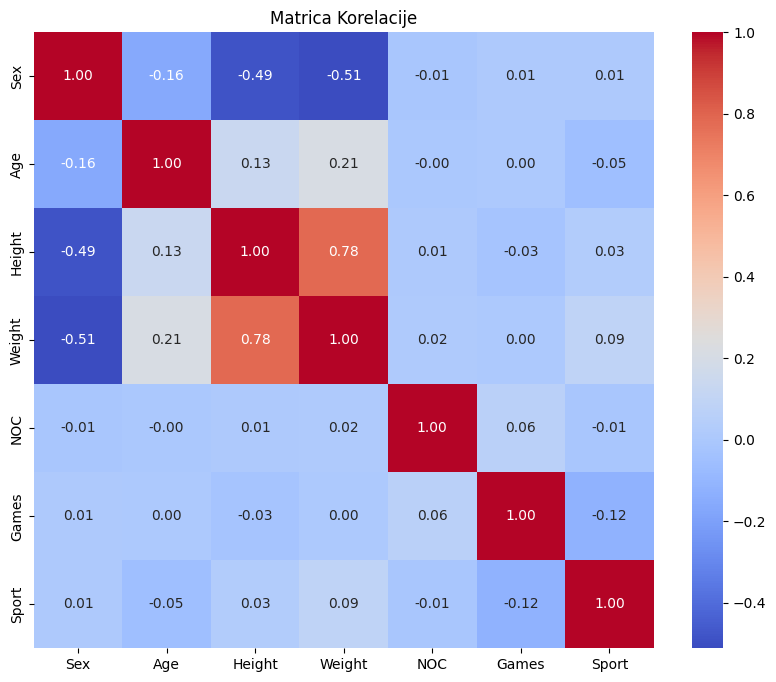

In [3]:
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrica Korelacije')
plt.show()

In [4]:
X.drop(columns=['NOC', 'Games'], inplace=True)

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
from sklearn.cluster import KMeans

In [9]:
# km_model = KMeans(n_clusters=3, n_init='auto', random_state=22)
# km_model.fit(X)

In [10]:
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c = km_model.labels_)
# plt.title('3 Klastera')
# plt.xlabel('Pc1')
# plt.ylabel('Pc2')
# plt.show()

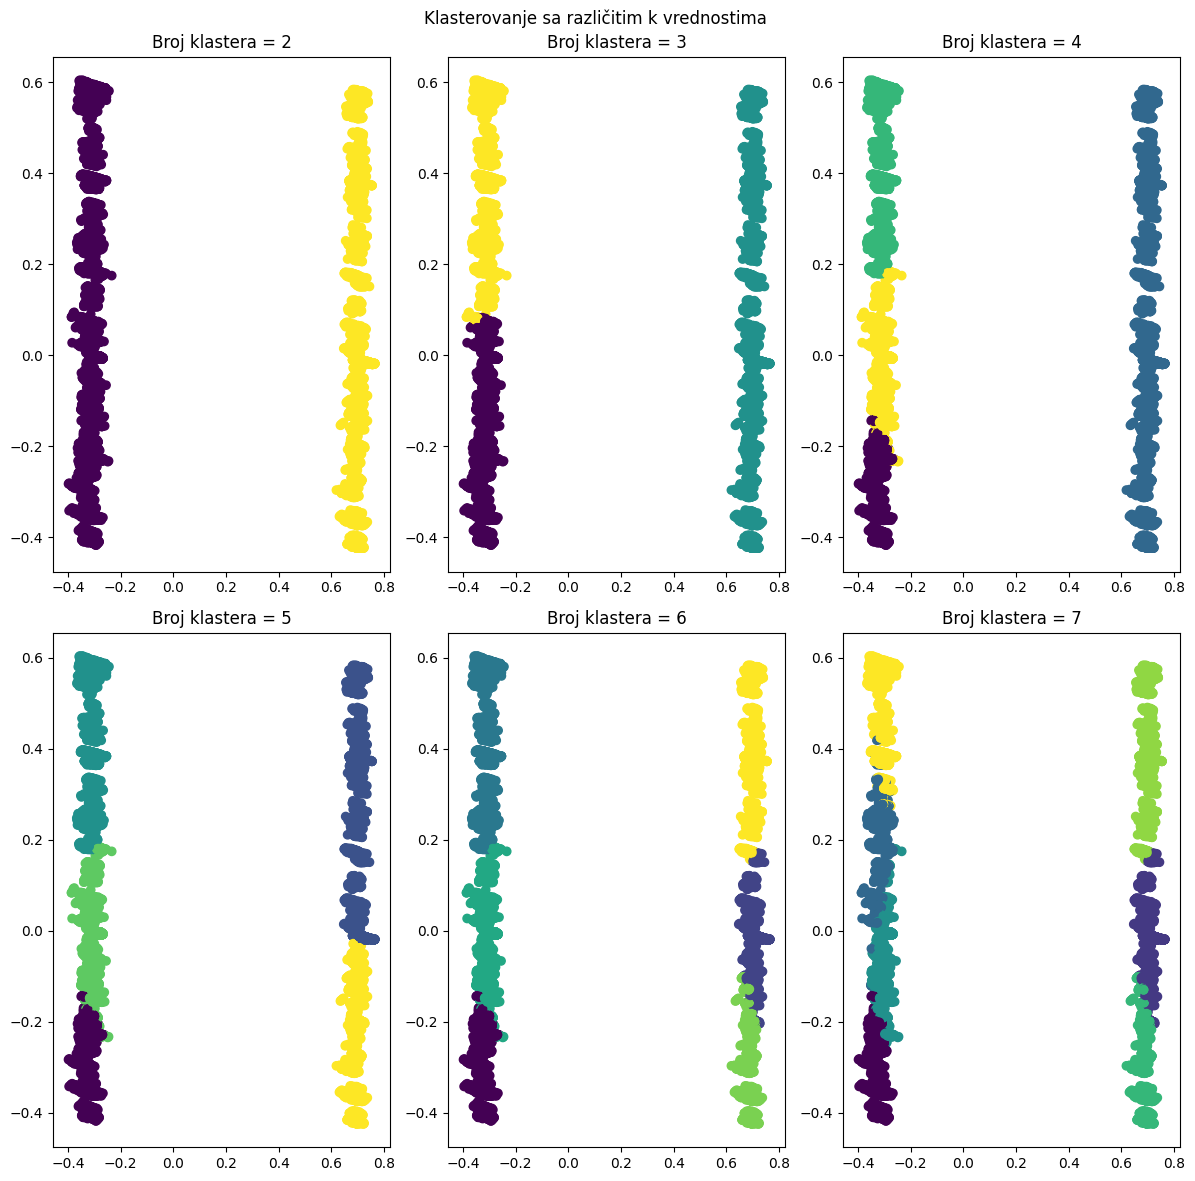

In [11]:
ks = [i for i in range(2, 8)]

sse_km = []
silhouettes_km = []

best_km_model = None
best_score = float('-inf')

fig, axs = plt.subplots(2, 3, figsize = (12, 12))
fig.suptitle("Klasterovanje sa različitim k vrednostima")

for k, a in zip(ks, axs.flatten()):
    km_model = KMeans(n_clusters = k, n_init = 'auto', random_state = 22)
    km_model.fit(X)

    sse_km.append(km_model.inertia_)
    score = silhouette_score(X, km_model.labels_)
    silhouettes_km.append(score)
    
    a.scatter(X_pca[:, 0], X_pca[:, 1], c = km_model.labels_)
    a.set_title(f"Broj klastera = {k}")
    
    if score > best_score:
        best_score = score
        best_km_model = km_model
 

plt.tight_layout()
plt.show()

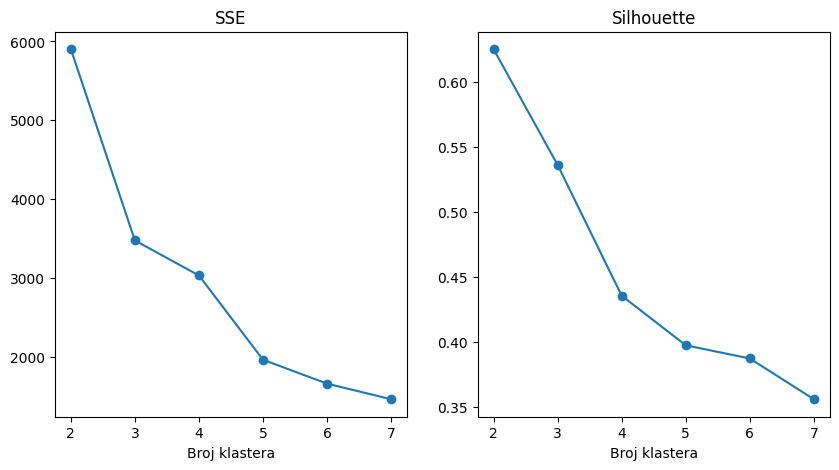

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(ks, sse_km, marker='o')
ax[0].set_xticks(ks)
ax[0].set_xlabel('Broj klastera')
ax[0].set_title('SSE')

ax[1].plot(ks, silhouettes_km, marker='o')
ax[1].set_xticks(ks)
ax[1].set_xlabel('Broj klastera')
ax[1].set_title('Silhouette')

plt.show()

In [13]:
print(best_km_model)

KMeans(n_clusters=2, n_init='auto', random_state=22)


Najbolji modeli su sa 4 klastera ili sa 6 klastera

In [14]:
from sklearn.cluster import BisectingKMeans

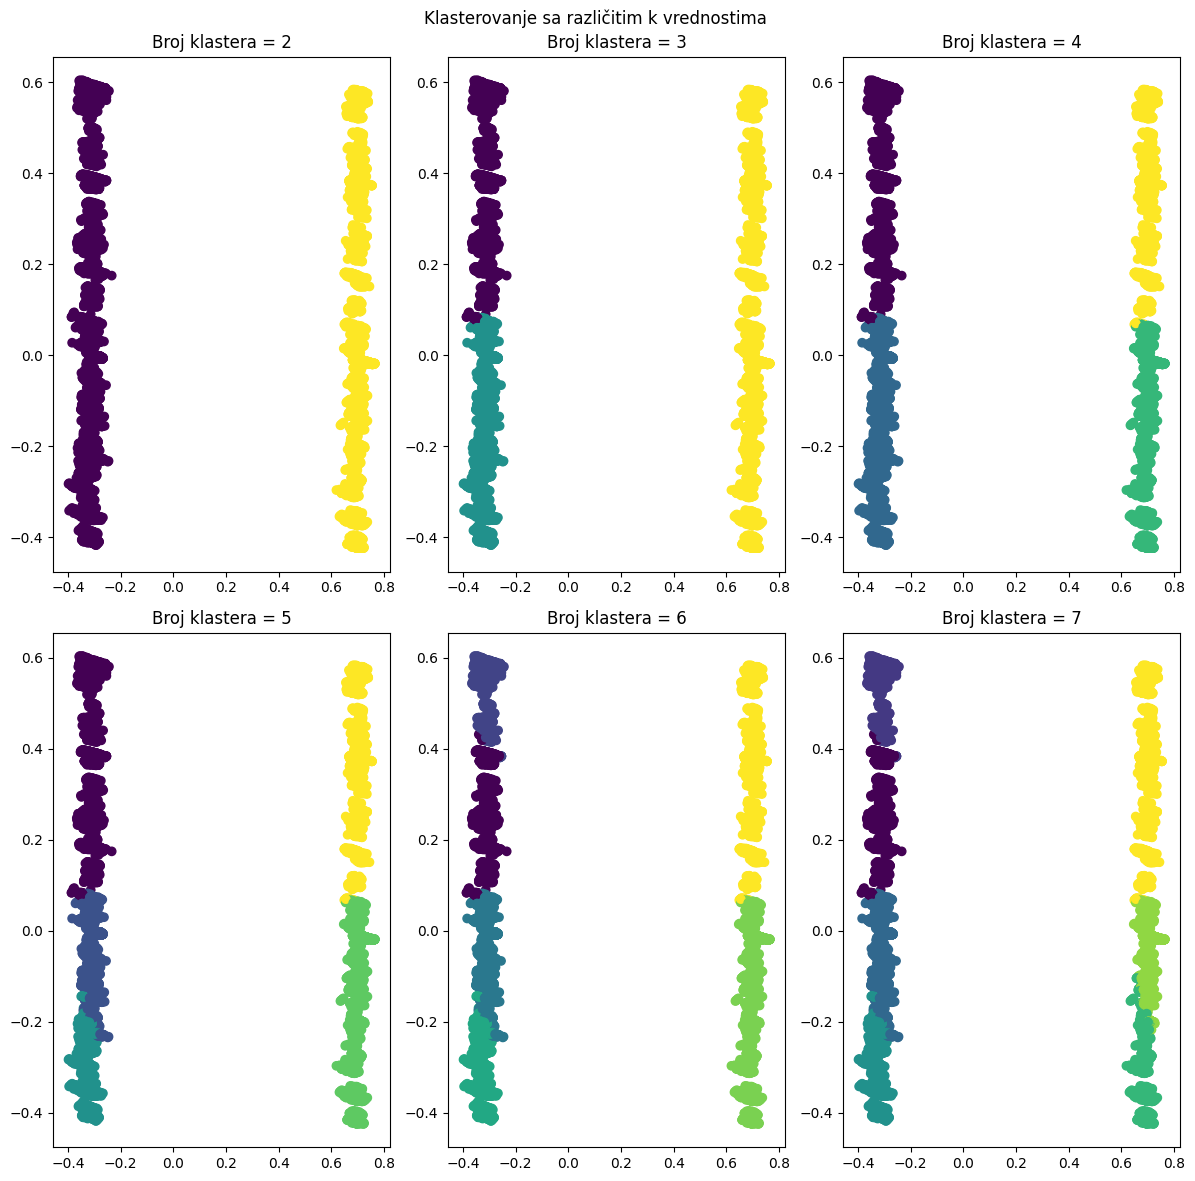

In [15]:
ks = [i for i in range(2, 8)]

sse_bkm = []
silhouettes_bkm = []

best_bkm_model = None
best_score = float('-inf')

fig, axs = plt.subplots(2, 3, figsize = (12, 12))
fig.suptitle("Klasterovanje sa različitim k vrednostima")

for k, a in zip(ks, axs.flatten()):
    bkm_model = BisectingKMeans(n_clusters = k, init = 'k-means++', random_state = 22)
    bkm_model.fit(X)

    sse_bkm.append(bkm_model.inertia_)
    score = silhouette_score(X, bkm_model.labels_)
    silhouettes_bkm.append(score)
    
    a.scatter(X_pca[:, 0], X_pca[:, 1], c = bkm_model.labels_)
    a.set_title(f"Broj klastera = {k}")
    
    if score > best_score:
        best_score = score
        best_bkm_model = bkm_model

plt.tight_layout()
plt.show()

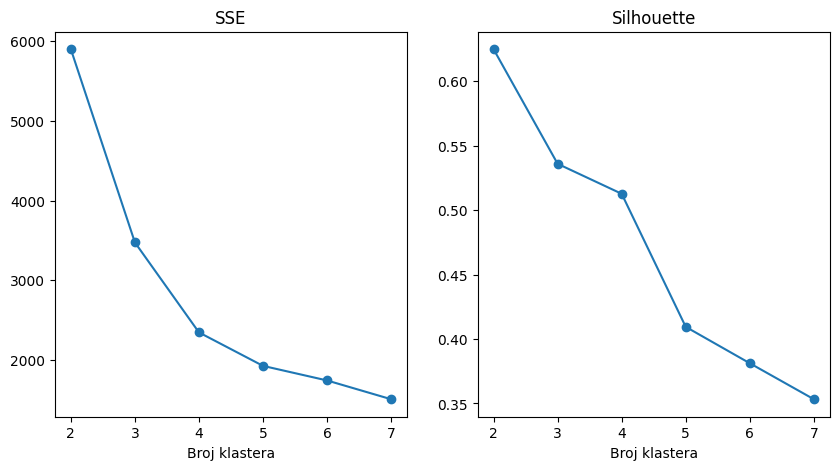

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(ks, sse_bkm, marker='o')
ax[0].set_xticks(ks)
ax[0].set_xlabel('Broj klastera')
ax[0].set_title('SSE')

ax[1].plot(ks, silhouettes_bkm, marker='o')
ax[1].set_xticks(ks)
ax[1].set_xlabel('Broj klastera')
ax[1].set_title('Silhouette')

plt.show()

In [17]:
print(best_bkm_model)

BisectingKMeans(init='k-means++', n_clusters=2, random_state=22)


Vidimo da SSE strmo opada do 4. klastera, a posle postepeno. Silhouette opada, ali dostiže špic u 4. klasteru pa se iz toga može zaključiti da je najbolji model onaj koji klasteruje u 4 klastera.

## Eksportovanje modela

In [ ]:
joblib.dump((best_km_model, best_bkm_model, silhouettes_km, silhouettes_bkm), 'KMean_BisectingKmeans.joblib')